In [196]:
# Copyright 2023 YASSIN KORTAM

# Permission is hereby granted, free of charge, to any person obtaining a copy of 
# this software and associated documentation files (the “Software”), to deal in the 
# Software without restriction, including without limitation the rights to use, copy,
# modify, merge, publish, distribute, sublicense, and/or sell copies of the Software,
# and to permit persons to whom the Software is furnished to do so.

# THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, 
# EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF 
# MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. 
# IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, 
# DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, 
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt
import random
import pandas as pd
from datetime import datetime

#Constants
signal_size = 10

# Abstract
The DTFT of any signal can be written as the summation of complex exponentials.
- Given that the DTFT of an impulse is 1.
- Given time shifting property of DTFT
- Given linearity property of DTFT


In [197]:
#Evaluate the fourier transform at each omega
def yassinft(x):

    #Execute time shifting property on all the coeffecients
    #Using numexpr library to save time

    #Generate the exponents in a time effecient way
    w = np.arange(0, 2*np.pi, 2*np.pi/x.size)
    k = np.arange(0, w.size, 1)
    powers = ne.evaluate('w*k*-1')
    
    #Use euler formula to save time
    re = ne.evaluate('cos(powers)')
    im = 1j*ne.evaluate('sin(powers)')
    matrix = ne.evaluate('re + im')

    #Checks for numerical errors
    if x.size == matrix.size:
        matrix = ne.evaluate('x*matrix')
    else:
        x = np.append(x, 1)
        matrix = ne.evaluate('x*matrix')

    #Dot product of the yassinft matrix with all ones matrix
    return ne.evaluate('sum(matrix)')

# Demo
The FFT and YassinFT operations are executed on a signal of randomly generated integers.
The outputs are plotted together.

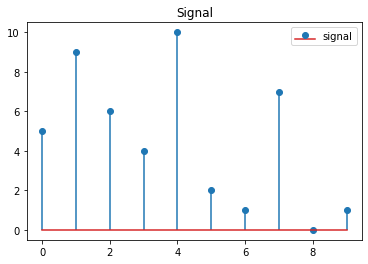

/Users/yassinkortam/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/yassinkortam/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


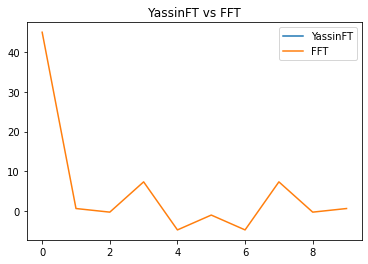

In [198]:
#Example signal
n = np.arange(0, signal_size, 1)
x = np.array([random.randint(0,10) for x in n])

#Evaluate the yassinft 
ft = yassinft(x) 

#Evaluate fft
ft2 = np.fft.fft(x)

#Plot the signal, yassinft, and normal fft
plt.figure()
plt.title("Signal")
plt.stem(n, x, label="signal")
plt.legend()
plt.show()

plt.figure()
plt.title("YassinFT vs FFT")
plt.plot(ft, label="YassinFT")
plt.plot(ft2, label="FFT")
plt.legend()
plt.show()

# Performance Comparison
In theory, the YassinFT has O(n) time complexity while FFT has O(nlog(n)) time complexity. A simple test is conducted to demonstrate this hypothesis

        Size  YassinFT Time  FFT Time  YassinFT:FFT
0  1000000.0       0.074315  0.018807      3.951454
1  2000000.0       0.098149  0.039819      2.464879
2  3000000.0       0.145696  0.058574      2.487383
3  4000000.0       0.122873  0.100496      1.222666
4  5000000.0       0.199661  0.141411      1.411920
5  6000000.0       0.161537  0.150073      1.076389
6  7000000.0       0.431571  0.211197      2.043452
7  8000000.0       0.352851  0.210230      1.678405
8  9000000.0       0.401908  0.476941      0.842679


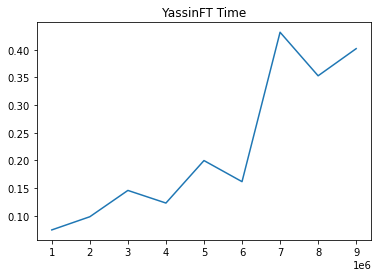

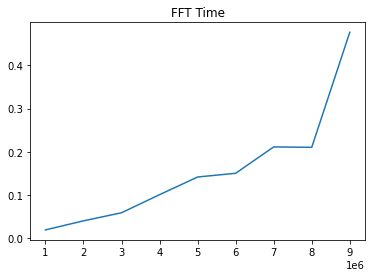

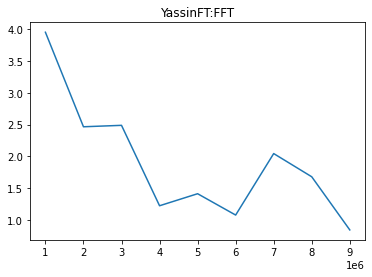

In [199]:
logs = {'Size':[],'YassinFT Time':[], 'FFT Time':[], 'YassinFT:FFT':[]}
for i in np.arange(1E6, 1E7, 1E6):

    #Generate signal
    x = np.random.randint(100,size=int(i))

    #YassinFT
    start = datetime.now()
    ft = yassinft(x)
    end = datetime.now()
    yassinFTTime = end - start

    #FFT
    start = datetime.now()
    ft2 = np.fft.fft(x)
    end = datetime.now()
    fftTime = end - start

    logs['Size'].append(i)
    logs['YassinFT Time'].append(yassinFTTime.total_seconds())
    logs['FFT Time'].append(fftTime.total_seconds())
    logs['YassinFT:FFT'].append(yassinFTTime.total_seconds()/fftTime.total_seconds())

logs = pd.DataFrame(logs)
print(logs)

plt.figure()
plt.title("YassinFT Time")
plt.plot(logs['Size'], logs['YassinFT Time'])

plt.figure()
plt.title("FFT Time")
plt.plot(logs['Size'], logs['FFT Time'])

plt.figure()
plt.title("YassinFT:FFT")
plt.plot(logs['Size'], logs['YassinFT:FFT'])